

# Project: Investigate a mdb-movies dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue
please note that the below details are not based on statistical analysis but observational data analysis 

we are trying to answer questions below:
- Which genres are most popular from year to year
- Movie runtime across year , incraesed or decreased
- relation between Genere and revenu, budget
- highst profit companies
- Top 20 actors acording to the highst revenu movies

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [391]:
#load data set into panda frame
df=pd.read_csv('tmdb-movies.csv')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [393]:
#In case zero values are entered instead of NaN

for column in list(df.columns):
    df[column] = df[column].replace(0, np.NaN)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                5170 non-null   float64
 4   revenue               4850 non-null   float64
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10835 non-null  float64
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [394]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [395]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [396]:
for column in list(df.columns):
    df[column] = df[column].replace(0, np.NaN)

In [397]:
#drop columns not needed :
df.drop(['homepage', 'tagline','keywords','overview','revenue','budget'], axis=1, inplace=True)

In [398]:
#investgate NaN values in diffrent columns
df[df.imdb_id.isnull()].count() # 10 rows , mostly with null budget or revenu , can be dropped 

id                      10
imdb_id                  0
popularity              10
original_title          10
cast                    10
director                 6
runtime                 10
genres                   8
production_companies     5
release_date            10
vote_count              10
vote_average            10
release_year            10
budget_adj               1
revenue_adj              0
dtype: int64

In [399]:
df[df.budget_adj.isnull()].count() # 5696 rows , almost (50% of data)

id                      5696
imdb_id                 5687
popularity              5696
original_title          5696
cast                    5631
director                5656
runtime                 5668
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj                 0
revenue_adj              995
dtype: int64

In [400]:
df[df.revenue_adj.isnull()].count() # 6016 rows ,  almost (more than 50% of data)

id                      6016
imdb_id                 6006
popularity              6016
original_title          6016
cast                    5945
director                5973
runtime                 5985
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              1315
revenue_adj                0
dtype: int64

In [401]:
df[df.cast.isnull()].count() # 76 rows , mostly with null budget or revenu , can be dropped

id                      76
imdb_id                 76
popularity              76
original_title          76
cast                     0
director                70
runtime                 76
genres                  75
production_companies    36
release_date            76
vote_count              76
vote_average            76
release_year            76
budget_adj              11
revenue_adj              5
dtype: int64

In [402]:
df[df.runtime.isnull()].count() # 31 rows , mostly with NaN values for budgets , can be dropped 

id                      31
imdb_id                 31
popularity              31
original_title          31
cast                    31
director                29
runtime                  0
genres                  30
production_companies    13
release_date            31
vote_count              31
vote_average            31
release_year            31
budget_adj               3
revenue_adj              0
dtype: int64

In [403]:
df[df.genres.isnull()].count() # 23 rows , mostly with NaN values for budgets , can be dropped

id                      23
imdb_id                 21
popularity              23
original_title          23
cast                    22
director                21
runtime                 22
genres                   0
production_companies     9
release_date            23
vote_count              23
vote_average            23
release_year            23
budget_adj               1
revenue_adj              0
dtype: int64

In [404]:
df[df.production_companies.isnull()].count() # 1030 rows , mostly with NaN values for budgets , can be dropped

id                      1030
imdb_id                 1025
popularity              1030
original_title          1030
cast                     990
director                1007
runtime                 1012
genres                  1016
production_companies       0
release_date            1030
vote_count              1030
vote_average            1030
release_year            1030
budget_adj               136
revenue_adj               96
dtype: int64

In [405]:
df[df.director.isnull()].count() # 44 rows , mostly with NaN values for budgets , can be dropped

id                      44
imdb_id                 40
popularity              44
original_title          44
cast                    38
director                 0
runtime                 42
genres                  42
production_companies    21
release_date            44
vote_count              44
vote_average            44
release_year            44
budget_adj               4
revenue_adj              1
dtype: int64

In [406]:
#investigate the duplicates
df[df.duplicated()] # one duplicate record to be dropped 

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning:
We will use this section to apply data clean up to the dataset as per observations:
- To be able to correctly compare the budget and revenue we will use budget_adj and revenue_adj instead of revenue and budget values
- Dropping below columns as they will not be used in analysis:
    - homepage
    - tagline
    - keywords
    - overview
    - revenue
    - budget

- One row was found as duplicate and will be removed

- For the missing values in budget_adj and revenue_adj , we will split the data set into 2 sets:
    - df_rating : in this set we will remove all the budget and revenu related data to be able to analyze the entire data based on the rating vs genres, actors, runtime...
    - df_profit : in this set we will include only 3805 records where both budget and revenue available to be able to check the profit relations to genres, actors, runtime...
    
- Values in genres, actors, production_companies will be used the Exploratory Data Analysis phase, we need to create sets for unique values to be used 

- Adding column to express the voting rate (some movies with high average vote compared to vote count)in both df_rating and df_profit 

- Adding a column profit (revenu-budget) in df_profit


In [407]:
# Drop identified columns:
df.dropna(subset=['imdb_id', 'cast','runtime','genres','production_companies','director'], inplace = True)

In [408]:
df.drop_duplicates(inplace = True)

In [409]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,5.020000e+03,4.750000e+03
mean,62953.076663,0.695320,103.076765,239.638926,5.964395,2000.861125,3.779483e+07,1.173732e+08
std,90456.110483,1.037466,27.629366,603.416748,0.913001,13.038872,4.221077e+07,2.002779e+08
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10217.000000,0.232913,91.000000,18.000000,5.400000,1994.000000,8.891774e+06,1.163858e+07
50%,18632.000000,0.420185,100.000000,46.000000,6.000000,2005.000000,2.374361e+07,4.584735e+07
75%,70133.000000,0.777228,112.000000,174.000000,6.600000,2011.000000,5.082002e+07,1.349884e+08
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9757 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9757 non-null   int64  
 1   imdb_id               9757 non-null   object 
 2   popularity            9757 non-null   float64
 3   original_title        9757 non-null   object 
 4   cast                  9757 non-null   object 
 5   director              9757 non-null   object 
 6   runtime               9757 non-null   float64
 7   genres                9757 non-null   object 
 8   production_companies  9757 non-null   object 
 9   release_date          9757 non-null   object 
 10  vote_count            9757 non-null   int64  
 11  vote_average          9757 non-null   float64
 12  release_year          9757 non-null   int64  
 13  budget_adj            5020 non-null   float64
 14  revenue_adj           4750 non-null   float64
dtypes: float64(5), int64

In [411]:
df_rating = df.copy()
df_rating.drop(['revenue_adj','budget_adj'], axis=1,inplace=True)
df_rating['vote_rate'] = df_rating.vote_count/df_rating.vote_average

In [412]:
df_profit = df.copy()
df_profit.dropna(subset=['revenue_adj','budget_adj'], inplace = True)
df_profit['vote_rate'] = df_profit.vote_count/df_profit.vote_average
df_profit['profit'] = df_profit.revenue_adj-df_profit.budget_adj

In [413]:
## function to create unique_values

def unique_value (df, index , field):
    sep_value=df.set_index([index])[field].str.split('|', expand=True).stack().reset_index()# split the concatenated values of genres
    sep_value.rename(columns={0: field} ,inplace=True)
    unique_value = set(sep_value[field].tolist())
    return unique_value

In [414]:
#creating unique_values list
genres_unique =  unique_value (df_rating, 'imdb_id' ,'genres')
actor_unique = unique_value (df_rating, 'imdb_id' ,'cast')
director_unique = unique_value (df_rating, 'imdb_id' ,'director')
company_unique = unique_value (df_rating, 'imdb_id' ,'production_companies') 

In [415]:
df_rating.info(),df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9757 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9757 non-null   int64  
 1   imdb_id               9757 non-null   object 
 2   popularity            9757 non-null   float64
 3   original_title        9757 non-null   object 
 4   cast                  9757 non-null   object 
 5   director              9757 non-null   object 
 6   runtime               9757 non-null   float64
 7   genres                9757 non-null   object 
 8   production_companies  9757 non-null   object 
 9   release_date          9757 non-null   object 
 10  vote_count            9757 non-null   int64  
 11  vote_average          9757 non-null   float64
 12  release_year          9757 non-null   int64  
 13  vote_rate             9757 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB
<class 'pandas

(None, None)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( Which genres are most popular from year to year?)

To be able to determine the most popular genres from year to year, we need to explore 3 features:
- Mean popularity for each genres across the years 
- vote_count/vote_average for each genres across the years (some movies has high vote_average compared due to low vote_count) 
- Number of movies in each genres across the years 

In [416]:
## function to craete new dataframe for the concatenated values grouped by and filtered by another values 

def de_concat (original_df,  field ,unique_values , group_value, fun_value, fun ):
    df = pd.DataFrame({field: []})
    for name in unique_values:
        if fun =='count':
            temp= original_df[original_df[field].str.contains(name)].groupby([group_value])[fun_value].count()
        elif fun =='mean':
            temp= original_df[original_df[field].str.contains(name)].groupby([group_value])[fun_value].count()
        temp =temp.to_frame()
        temp= temp.T
        temp.insert(loc=0, column=field, value=name)
        df=df.append(temp)
    df.set_index(field, inplace=True) 
    return df

In [417]:
## Plot function

def plot_fn (x_axis , df , title , xlabel , ylabel ):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(x_axis, df.T, marker = '.')
    plt.legend(df.index)
    ax.set(title = title,ylabel = ylabel ,xlabel = xlabel ) 
    plt.show();

In [418]:
df_genere_movienum = de_concat (df_rating,  'genres' ,genres_unique , 'release_year', 'imdb_id', 'count' )
df_genere_popularity= de_concat (df_rating,  'genres' ,genres_unique , 'release_year', 'popularity', 'mean' )
df_genere_vote = de_concat (df_rating,  'genres' ,genres_unique , 'release_year', 'vote_rate', 'mean' )

In [419]:
df_genere_movienum.head(),df_genere_popularity.head(),df_genere_vote.head()

(                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
 genres                                                                        
 Action            8.0   7.0   6.0   4.0   5.0   9.0  14.0   6.0   6.0  10.0   
 Animation         NaN   1.0   NaN   1.0   2.0   1.0   2.0   1.0   3.0   2.0   
 Documentary       NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN   NaN   
 Science Fiction   3.0   3.0   2.0   2.0   4.0   1.0   6.0   3.0   4.0   3.0   
 Horror            7.0   3.0   5.0   9.0   6.0   4.0   3.0   4.0   4.0   1.0   
 
                  ...  2006  2007  2008  2009  2010   2011  2012   2013   2014  \
 genres           ...                                                            
 Action           ...  69.0  89.0  88.0  95.0  99.0  105.0  96.0  110.0  124.0   
 Animation        ...  31.0  29.0  30.0  43.0  46.0   36.0  35.0   39.0   34.0   
 Documentary      ...  11.0   8.0  20.0  13.0  19.0   27.0  28.0   39.0   46.0   
 Science Fiction  ...  26.0 

##### Feature 1: Number of movies in each genres across the years 

In [420]:
years=df_genere_movienum.columns

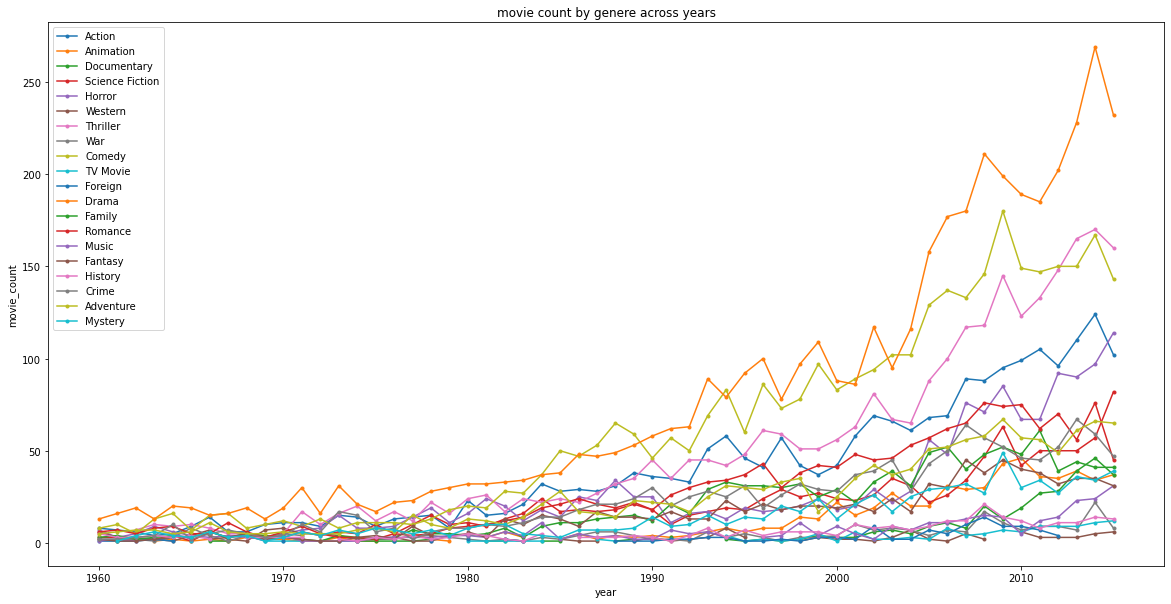

In [421]:
plot_fn (years , df_genere_movienum , "movie count by genere across years" , "year" ,"movie_count")

##### Feature 2: Mean of popularity in each genres across the years 

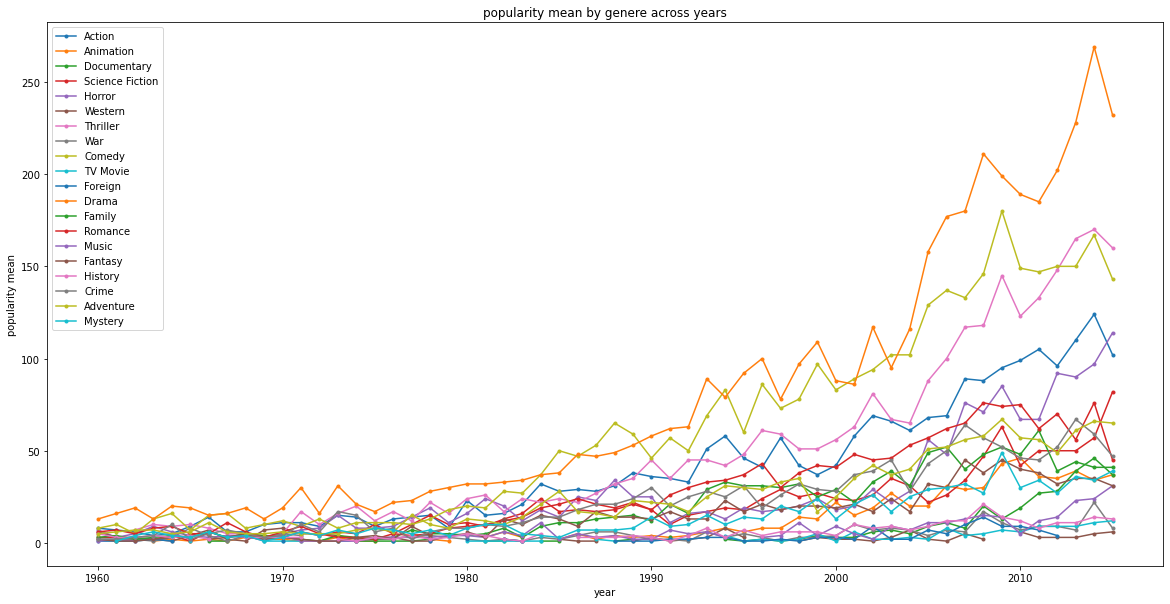

In [422]:
plot_fn (years , df_genere_popularity , "popularity mean by genere across years" , "year" ,"popularity mean")

##### Feature 3: Mean of vote rate in each genres across the years 

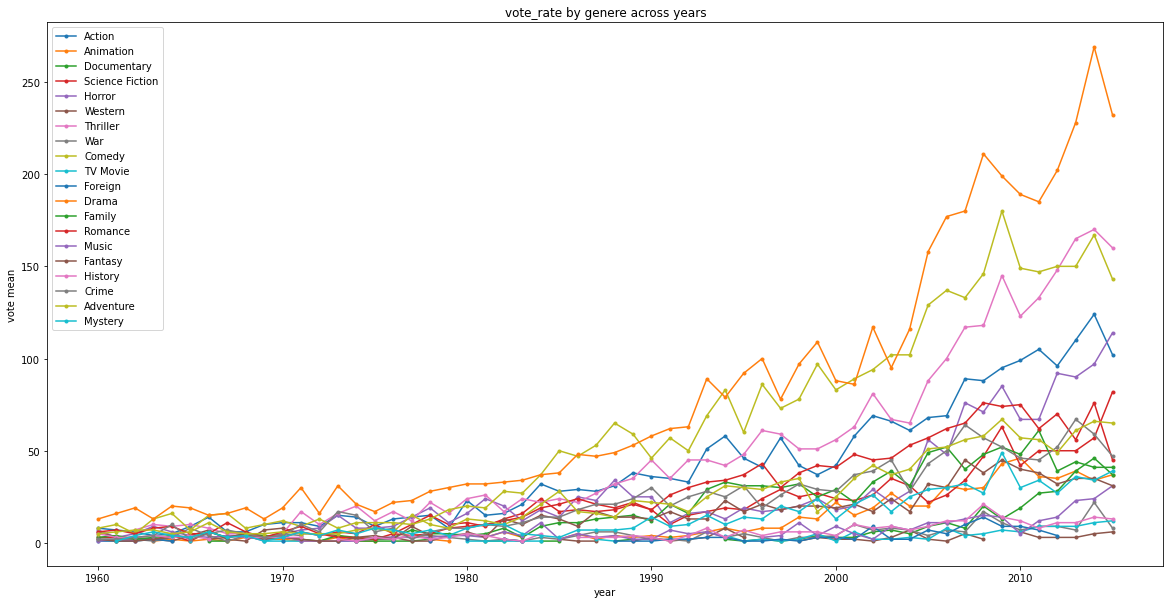

In [423]:
plot_fn (years , df_genere_vote , "vote_rate by genere across years" , "year" ,"vote mean")

In [424]:
#compute the total number of movies for each genres and sort it descending to re-check the visualization
#only in this dataframe and we do not need to sum the mean for vote rate and popularity
df_genere_movienum.sort_index()
df_genere_popularity.sort_index()
df_genere_vote.sort_index()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres,,,,,,,,,,,,,,,,,,,,,
Action,8.0,7.0,6.0,4.0,5.0,9.0,14.0,6.0,6.0,10.0,...,69.0,89.0,88.0,95.0,99.0,105.0,96.0,110.0,124.0,102.0
Adventure,5.0,6.0,7.0,7.0,5.0,6.0,11.0,6.0,5.0,5.0,...,52.0,56.0,58.0,67.0,57.0,56.0,49.0,61.0,66.0,65.0
Animation,NaN,1.0,NaN,1.0,2.0,1.0,2.0,1.0,3.0,2.0,...,31.0,29.0,30.0,43.0,46.0,36.0,35.0,39.0,34.0,37.0
Comedy,8.0,10.0,5.0,13.0,16.0,7.0,15.0,16.0,8.0,10.0,...,137.0,133.0,146.0,180.0,149.0,147.0,150.0,150.0,167.0,143.0
Crime,2.0,2.0,3.0,4.0,10.0,2.0,5.0,7.0,5.0,3.0,...,50.0,64.0,57.0,52.0,46.0,45.0,52.0,67.0,59.0,47.0
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,11.0,8.0,20.0,13.0,19.0,27.0,28.0,39.0,46.0,37.0
Drama,13.0,16.0,19.0,13.0,20.0,19.0,15.0,16.0,19.0,13.0,...,177.0,180.0,211.0,199.0,189.0,185.0,202.0,228.0,269.0,232.0
Family,3.0,4.0,2.0,3.0,4.0,3.0,6.0,3.0,5.0,4.0,...,52.0,40.0,48.0,52.0,48.0,61.0,39.0,44.0,41.0,41.0
Fantasy,2.0,1.0,1.0,2.0,3.0,NaN,2.0,3.0,5.0,2.0,...,30.0,45.0,38.0,45.0,40.0,38.0,32.0,35.0,35.0,31.0


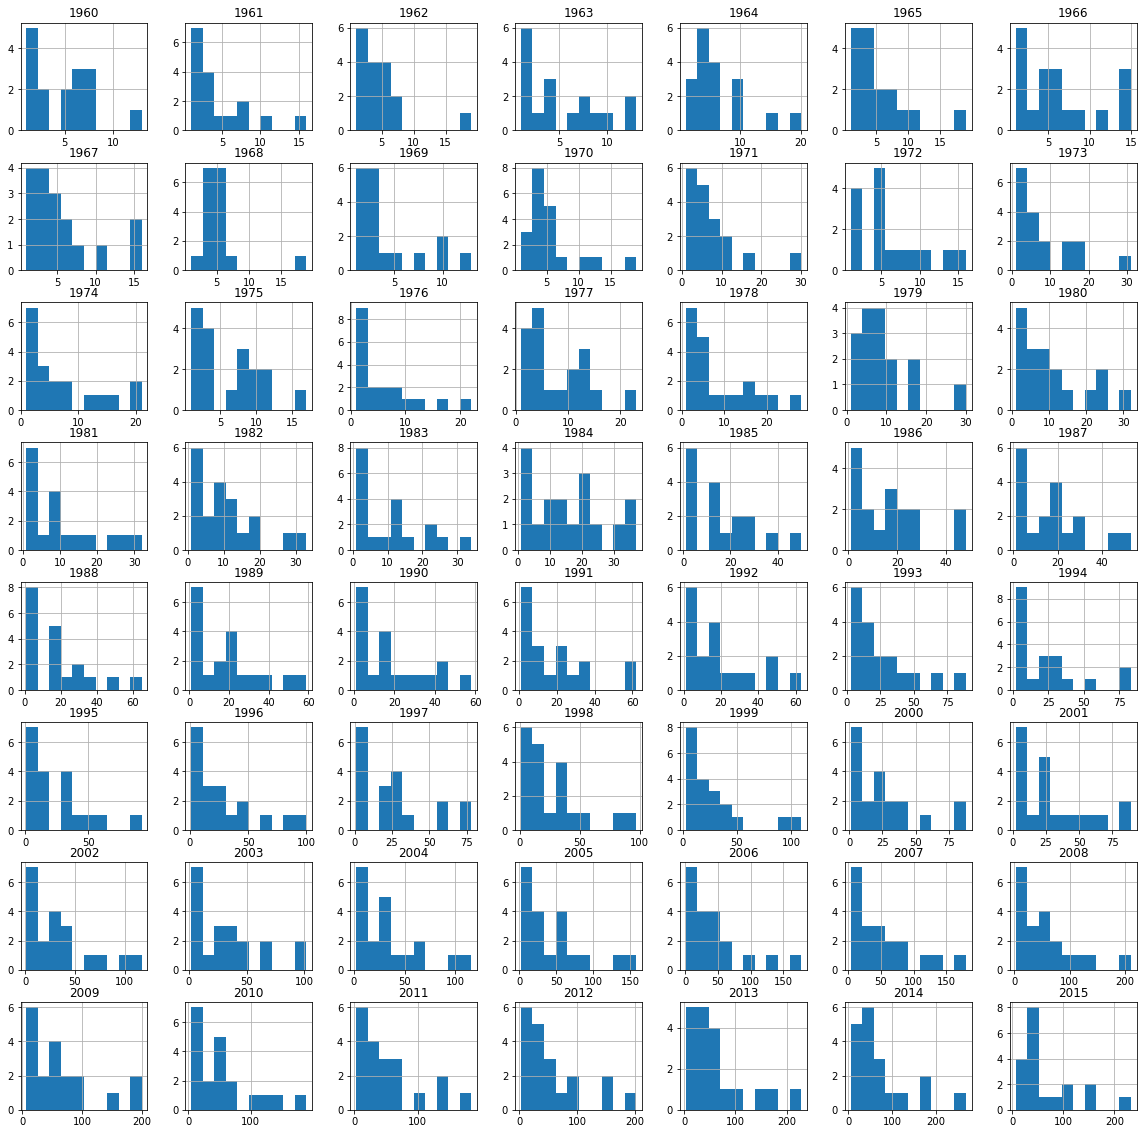

In [425]:
df_genere_movienum.hist(figsize=(20,20));

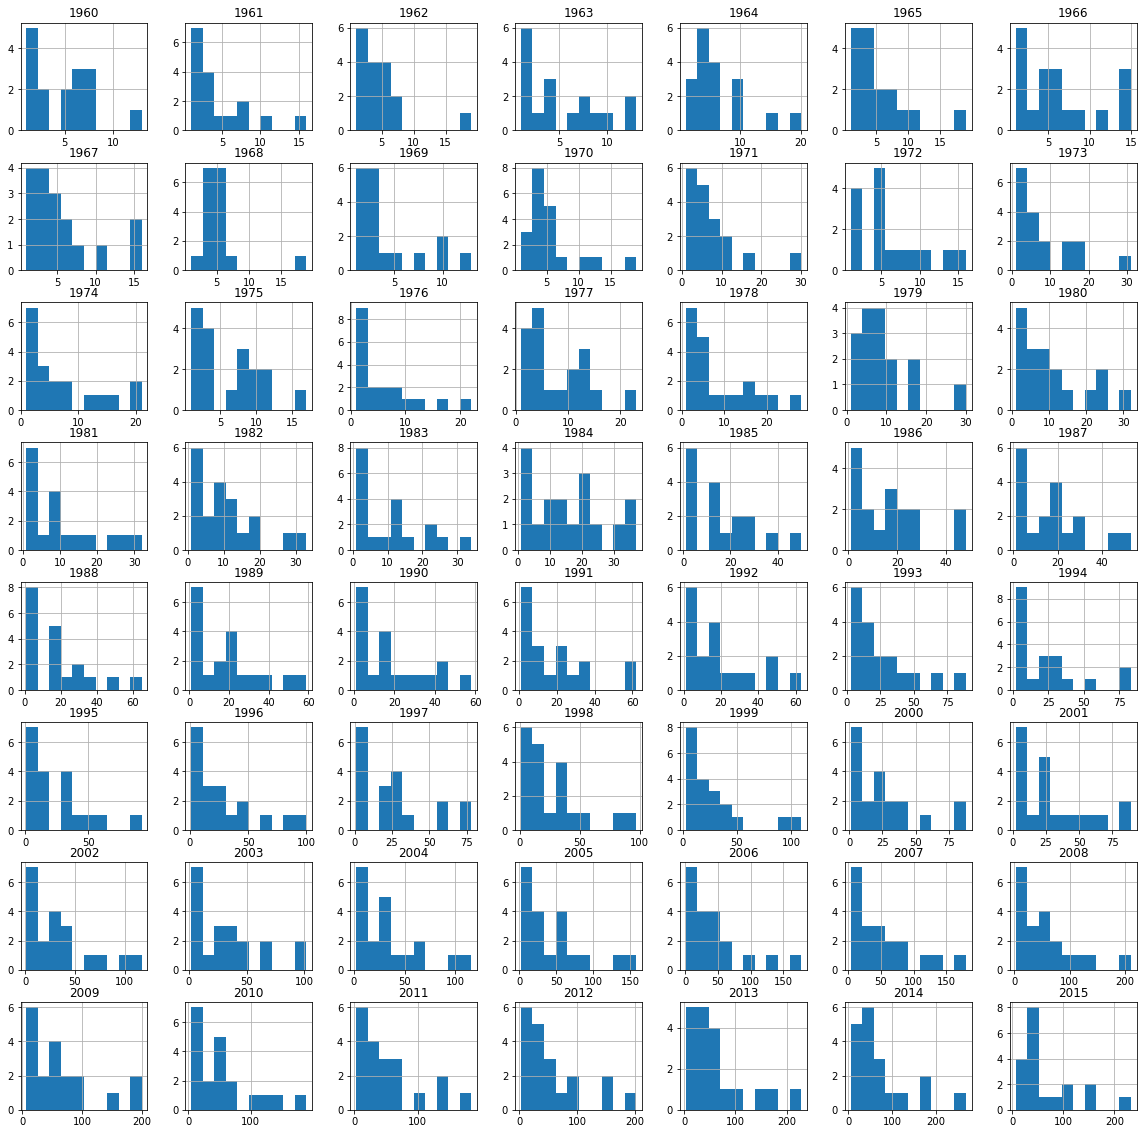

In [426]:
df_genere_popularity.hist(figsize=(20,20));

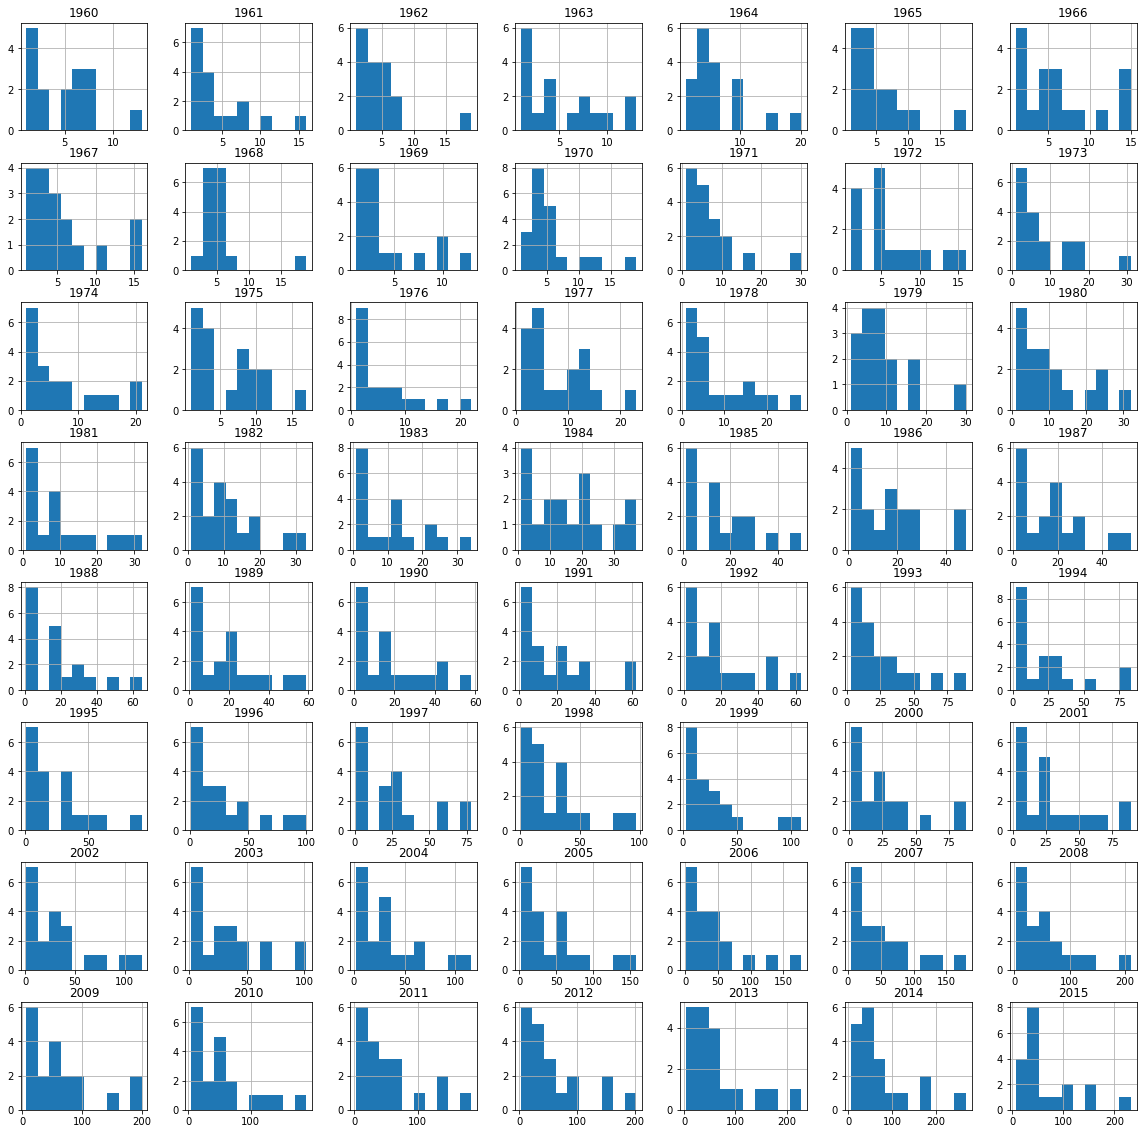

In [427]:
df_genere_vote.hist(figsize=(20,20));

The three indicators are all pointing to Animation to be the most popular movie type followed by adventure, action and  thriller.

### Research Question 2  (which grenes with highest budget and revenu?)

The more companies spend of production, they more revenu they are aiming to (nobody wants to waste money), which geners is the most profitable ?

In [428]:
def de_concat2 (field1 ,field2 , original_df , unique_values ):
    df = pd.DataFrame({field1: [],field2:[]})
    for name in unique_values:
        df.loc[-1] = [name,original_df[original_df[field1].str.contains(name)][field2].mean()]  # adding a row
        df.index = df.index + 1  # shifting index
        df = df.sort_index() 
    return df

In [429]:
df_genere_budget = de_concat2 ('genres' ,'budget_adj' , df_profit, genres_unique )
df_genere_revenu = de_concat2 ('genres' ,'revenue_adj' , df_profit, genres_unique )

In [430]:
# Geners=df_genere_budget.genres.unique()

# fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(Geners, df_genere_budget.budget_adj, marker = '.')
# ax.plot(Geners, df_genere_revenu.revenue_adj, marker = '.')
# plt.setp(ax.get_xticklabels(), rotation = 45)
# plt.legend(('genere_budget','genere_revenu'))
# ax.set(title = "Average retweet and Favorite compared to tweet numbers",xlabel = "month/year", ylabel = "Average Favorite/retweet count")
# plt.show()

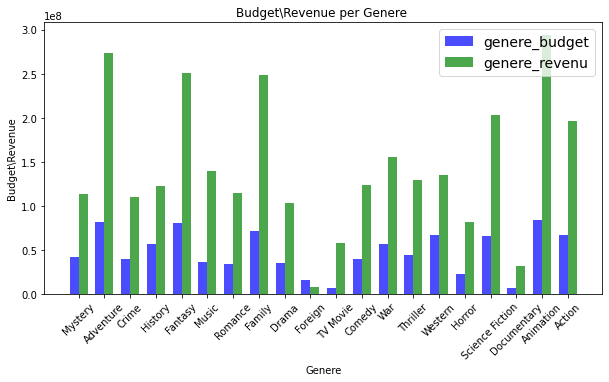

In [431]:

ind = np.arange(20) # the x locations for the groups
width = 0.35       # the width of the bars
f, ax = plt.subplots(figsize=(10,5))

# plot bars
genere_budget = plt.bar(ind, df_genere_budget.budget_adj, width, color='b', alpha=.7, label='genere_budget')
genere_revenu = plt.bar(ind + width, df_genere_revenu.revenue_adj, width, color='g', alpha=.7, label='genere_revenu')

# title and labels
plt.ylabel('Budget\Revenue')
plt.xlabel('Genere')
plt.title('Budget\Revenue per Genere ')

locations = ind + width / 2  # xtick locations
labels = df_genere_budget.genres.unique()  # xtick labels
plt.xticks(locations, labels)
plt.xticks(rotation=45)

# legend
plt.legend(fontsize = 14)


The animation category is the highst profitable followed by Adventure and action movies which matches the popularity indicators 

### Research Question 3  (For the highst revenu 20 movies )

what are the highest  revenu movies across time ? as we are using the adj values for revenu which matches the 2010 dollars should the highst revenu movies be among the latest years ?


In [432]:
company_100= df_profit.sort_values(by=['revenue_adj'],ascending=False)[100::-1]

In [433]:
company_100.sort_values(by=['revenue_adj'], ascending = False)[20::-1]

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rate,profit
2412,1893,tt0120915,3.526029,Star Wars: Episode I - The Phantom Menace,Liam Neeson|Ewan McGregor|Natalie Portman|Jake...,George Lucas,136.0,Adventure|Action|Science Fiction,Lucasfilm,5/19/99,2823,6.3,1999,1.505411e+08,1.209981e+09,448.095238,1.059439e+09
7987,1892,tt0086190,4.828854,Return of the Jedi,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Richard Marquand,135.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,5/23/83,3101,7.8,1983,7.082424e+07,1.253819e+09,397.564103,1.182995e+09
7269,238,tt0068646,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175.0,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,478.313253,1.246626e+09
3374,12445,tt1201607,5.711315,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,487.012987,1.166009e+09
14,99861,tt2395427,5.944927,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,581.621622,1.035032e+09
4949,122,tt0167260,7.122455,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,201.0,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/03,5636,7.9,2003,1.114231e+08,1.326278e+09,713.417722,1.214855e+09
10398,9325,tt0061852,2.550704,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,78.0,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09,132.571429,1.319404e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,403.698630,1.210949e+09
10223,329,tt0107290,2.204926,Jurassic Park,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,Steven Spielberg,127.0,Adventure|Science Fiction,Universal Pictures|Amblin Entertainment,6/11/93,3169,7.4,1993,9.509661e+07,1.388863e+09,428.243243,1.293767e+09
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,855.692308,1.254446e+09


In [434]:
actor_unique_2x =  unique_value (company_100, 'imdb_id' ,'cast')
company_unique_2 =  unique_value (company_100, 'imdb_id' ,'production_companies')

In [435]:
df_company_revenue = de_concat2 ('production_companies' ,'revenue_adj' , company_100, company_unique_2 )
df_actor_revenue = de_concat2 ('cast' ,'revenue_adj' , company_100, actor_unique_2 )

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [436]:
df_actor_revenue.sort_values(by=['revenue_adj'], ascending = False)[20::-1]

,cast,revenue_adj
53,Carrie Fisher,1.842720e+09
165,Daisy Ridley,1.902723e+09
117,Adam Driver,1.902723e+09
226,Roy Scheider,1.907006e+09
187,Lorraine Gary,1.907006e+09
338,Murray Hamilton,1.907006e+09
67,Michelle Rodriguez,2.106436e+09
216,Lee J. Cobb,2.167325e+09
198,Max von Sydow,2.167325e+09
16,Ellen Burstyn,2.167325e+09


In [437]:
df_company_revenue.sort_values(by=['revenue_adj'], ascending = False)[20::-1]

,production_companies,revenue_adj
74,Walt Disney Feature Animation,1.159592e+09
68,Dentsu,1.172142e+09
109,Walt Disney Animation Studios,1.192711e+09
7,Universal Pictures,1.193430e+09
13,Alfran Productions,1.277914e+09
54,Lucasfilm,1.288305e+09
53,Marvel Studios,1.291172e+09
41,Prime Focus,1.292632e+09
35,Revolution Sun Studios,1.292632e+09
101,Media Rights Capital,1.385749e+09


The top 20 movies are distributed among the entire intervals (1960s to 2015) , all of them under the same defined popular categories 

### Research Question 4  (Movie time across time increased or decreased?)
Has the runtime of movies produced by year increased or decreased?

In [438]:
runtime=df_rating.groupby('release_year')['runtime'].mean()

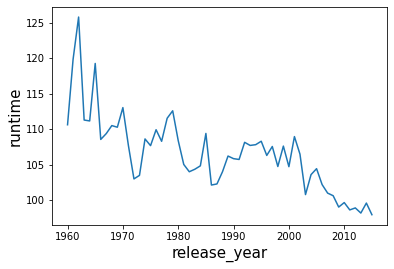

In [439]:
plt.plot(runtime)
plt.xlabel('release_year',size=15)
plt.ylabel('runtime',size=15);

The runtime of movies has decreased almost to the half duration since mid 1960s to 2015 .

<a id='conclusions'></a>
## Conclusions

The dataset can provide a good insignt to the movie bussnuees but we were concerned to find answers for the below questions:
- Genres are most popular from year to year:
    - Most common assigment is Animation  which showed increase over year combined with another genres
    - Movies with Genres Action, adventure , Thriller, science fiction have also showed a growth in number of movies , ratng and popularity measures
    - Documentary started to get steady since mid 90's and increasing in all measures
    
- Highst profit Genre is animation as budget is much lower than revenue Followed by Adventure movies ehich follow the popularity as animation has most popular indictors 

- runtime of movies decreased across time from more than 2 hrs to almost 90 min by 2015

- the highest profit companies (Walt Disney,Marvel..) matches the geners produced for highst Gener (animations and adventures )

##### Limitations :
- The set did not contain box office data to check the revenu per week , did it increase or decrease for each movie and the affect of release date of movies on each other
- Genres was a concatenaded feild so one movie can be classified as several genres which might affect affect the accuracy of gerne  popularity 
- The cast data should be seprated by Female lead, male lead and supporting roles to be able to check the most popular actor in each role seprately 